In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(MASS)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [3]:
library(caret) #sample
library(nnet) #인공신경망 , 다항 로지스틱 회귀분석
library(e1071) # svm
library(randomForest) # randomForest
library(party) # 의사결정나무 ctree



Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [73]:



#입력 데이터, 정규화할 컬럼인덱스 벡터
fun_x <- function(f_df,cindex,targetcol){
    
# 표준화

f_df2 <- f_df
f_df2[,cindex] <- as.data.frame(scale(f_df[,cindex]))

# 샘플나누기

tindex = 0
for(i in 1:ncol(f_df2)){
    if(colnames(f_df2)[i] == targetcol){
        tindex = i
    }
}
    
sampling <- function(){
samp <<- createDataPartition(f_df2[,tindex] , p = 0.7,list = F)
data.tr <<- f_df2[samp,]
data.test <<- f_df2[-samp,]

x <<- data.test[,-tindex]
y <<- data.test[,tindex]
    
}    

sampling() 
head(samp)

#인공신경망 테스트
ANN <- function(data.tr , data.test , x , y ){
    
    model.nnet <- nnet(cluster ~ . , data=data.tr, size = 3)
    pred <- predict(model.nnet , x , type = "class")
    cat("예측력" ,mean(pred == y), "입니다.")
    print(pred)
    
    table(pred,y)
    return(mean(pred == y))
}

# ANN(data.tr , data.test , x , y )

#의사결정 나무 
CTREE <-function(data.tr , data.test , x , y ){
    model.ctree <- ctree(cluster ~ . , data=data.tr)
    pred <- predict(model.ctree , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
}

#  CTREE(data.tr , data.test , x , y )

#RandomForesst
RandomForest<-function(data.tr , data.test , x , y ){
    model.rf <- randomForest(cluster ~ . , data=data.tr, ntree = 100)
    pred <- predict(model.rf , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
} 

#SVM
SVM <-function(data.tr , data.test , x , y ){
    model.svm <- svm(cluster ~ . , data=data.tr)
    pred <- predict(model.svm , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
} 

#Logistic regression
Logisticreg <-function(data.tr , data.test , x , y ){
    model.log <- multinom(cluster ~ . , data=data.tr)
    pred <- predict(model.log , x )
    cat("예측력" ,mean(pred == y), "입니다.")
    table(pred,y)
    return(mean(pred == y))
} 

 a <- rep(0,5)
#a <- rep(0,4)
b<- rep(0,5)
iteration <- 20
    
data.test2 <- f_df2[samp,]

x2 <- data.test2[,-tindex]
y2 <- data.test2[,tindex]
for(i in 1:iteration){
    
    a = a + c(
            ANN(data.tr , data.test , x , y ),
            CTREE(data.tr , data.test , x , y ),
             RandomForest(data.tr , data.test , x , y ),
            SVM(data.tr , data.test , x , y ),
            Logisticreg(data.tr , data.test , x , y )
    )
    b = b + c(
        ANN(data.tr , data.test2 , x2 , y2 ),
        CTREE(data.tr , data.test2 , x2 , y2 ),
         RandomForest(data.tr , data.test2 , x2 , y2 ),
        SVM(data.tr , data.test2 , x2 , y2 ),
        Logisticreg(data.tr , data.test2 , x2 , y2 )
    )
}
a<- a/iteration
b<- b/iteration

result<-data.frame(train = b,test = a)
 rownames(result) = c("인공신경망","의사결정나무","RandomForest","SVM","로지스틱회귀분석")
#rownames(result) = c("인공신경망","의사결정나무","SVM","로지스틱회귀분석")
result
}




In [74]:
rep(0,5)

[1] 0 0 0 0 0

In [75]:

#df<-read.csv("./movies/new_movie_ver8.csv")
df <-read.csv("../movies/temp_mining_ver5.csv",fileEncoding = 'utf-8')
df10<-df
head(df)




영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,스크린점유율,감독점수,장르점수
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6.00,46.96312,4.000000,10
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스","류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,4.49,23.79760,3.000000,10
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,"김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1,6.98,48.26242,2.000000,10
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,"탁재훈,공형진,임형준,정준하,김해곤,정호빈",2,5.49,21.29854,2.833333,10
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠","유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1,8.81,36.90476,2.333333,10
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션",조의석,"설경구,정우성,한효주",영화사 집,"김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2,12.64,43.45238,3.500000,10


In [76]:
df<-df[,-(1:13)]

In [77]:
head(df)

cluster,감독배우시너지,스크린점유율,감독점수,장르점수
3,6.00,46.96312,4.000000,10
1,4.49,23.79760,3.000000,10
1,6.98,48.26242,2.000000,10
2,5.49,21.29854,2.833333,10
1,8.81,36.90476,2.333333,10
2,12.64,43.45238,3.500000,10


In [78]:
#unique(df$등급)

In [82]:


df2 <- df
head(df2)

df2$cluster <- as.factor(df2$cluster)

fun_x(df2,2:5,'cluster')


cluster,감독배우시너지,스크린점유율,감독점수,장르점수
3,6.00,46.96312,4.000000,10
1,4.49,23.79760,3.000000,10
1,6.98,48.26242,2.000000,10
2,5.49,21.29854,2.833333,10
1,8.81,36.90476,2.333333,10
2,12.64,43.45238,3.500000,10


# weights:  27
initial  value 87.888878 
iter  10 value 62.787814
iter  20 value 50.088241
iter  30 value 47.804251
iter  40 value 43.702098
iter  50 value 43.409310
iter  60 value 43.259590
iter  70 value 43.081732
iter  80 value 42.016016
iter  90 value 41.964185
iter 100 value 41.912857
final  value 41.912857 
stopped after 100 iterations
예측력 0.6129032 입니다. [1] "1" "1" "3" "3" "2" "3" "3" "2" "2" "2" "3" "1" "3" "3" "3" "2" "1" "1" "1"
[20] "1" "3" "1" "2" "2" "1" "1" "2" "1" "1" "3" "3"
예측력 0.3870968 입니다.예측력 0.516129 입니다.예측력 0.6129032 입니다.# weights:  18 (10 variable)
initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5806452 입니다.# weights:  27
initial  value 96.299840 
iter  10 value 58.082481
iter  20 value 50.668761
iter  30 value 47.065128
iter  40 value 45.366116
iter  50 value 44.846171
iter  60 value 44.748707
iter  70 value 44.635684
iter  80 value 44.232206
iter  90 value 44.200269
iter 100 value 44.190833
final  value 44.190833 
stop

initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5806452 입니다.# weights:  27
initial  value 94.892481 
iter  10 value 57.931002
iter  20 value 47.243607
iter  30 value 43.655116
iter  40 value 42.350337
iter  50 value 41.623407
iter  60 value 41.022178
iter  70 value 40.913121
iter  80 value 40.804672
iter  90 value 40.746635
iter 100 value 40.719482
final  value 40.719482 
stopped after 100 iterations
예측력 0.7532468 입니다. [1] "3" "1" "1" "1" "1" "2" "1" "1" "3" "3" "1" "3" "3" "3" "1" "3" "3" "1" "1"
[20] "1" "1" "2" "1" "1" "3" "1" "1" "1" "2" "1" "3" "1" "2" "3" "1" "2" "1" "3"
[39] "2" "1" "2" "1" "1" "1" "1" "3" "1" "1" "1" "1" "3" "3" "3" "2" "1" "1" "1"
[58] "2" "3" "3" "2" "1" "3" "3" "1" "1" "1" "2" "1" "1" "3" "1" "1" "1" "1" "1"
[77] "3"
예측력 0.5064935 입니다.예측력 1 입니다.예측력 0.6883117 입니다.# weights:  18 (10 variable)
initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5584416 입니다.# weights:  27
initial  

initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5584416 입니다.# weights:  27
initial  value 94.496774 
iter  10 value 57.958074
iter  20 value 48.351709
iter  30 value 43.334052
iter  40 value 43.220432
iter  50 value 43.203200
iter  60 value 43.197180
final  value 43.197147 
converged
예측력 0.5806452 입니다. [1] "1" "1" "3" "3" "2" "2" "2" "2" "2" "2" "3" "1" "3" "2" "2" "2" "2" "1" "1"
[20] "1" "2" "1" "2" "1" "1" "2" "2" "1" "1" "2" "2"
예측력 0.3870968 입니다.예측력 0.5483871 입니다.예측력 0.6129032 입니다.# weights:  18 (10 variable)
initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5806452 입니다.# weights:  27
initial  value 85.887391 
iter  10 value 59.070690
iter  20 value 48.355524
iter  30 value 45.473686
iter  40 value 45.158804
iter  50 value 44.835156
iter  60 value 44.358273
iter  70 value 43.693438
iter  80 value 43.479033
iter  90 value 43.242097
iter 100 value 43.076912
final  value 43.076912 
stopped after 100 i

initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5806452 입니다.# weights:  27
initial  value 86.105007 
iter  10 value 58.890653
iter  20 value 47.680937
iter  30 value 44.415021
iter  40 value 43.964140
iter  50 value 43.837595
iter  60 value 43.797772
iter  70 value 43.758682
iter  80 value 43.675688
iter  90 value 43.631884
iter 100 value 43.509198
final  value 43.509198 
stopped after 100 iterations
예측력 0.6883117 입니다. [1] "3" "1" "1" "1" "3" "3" "1" "1" "3" "3" "1" "3" "3" "3" "1" "3" "3" "1" "1"
[20] "1" "1" "2" "1" "3" "3" "1" "2" "2" "1" "1" "3" "1" "3" "3" "2" "3" "2" "3"
[39] "3" "1" "3" "3" "1" "1" "1" "3" "3" "1" "1" "1" "3" "3" "3" "3" "1" "1" "1"
[58] "3" "3" "3" "3" "1" "3" "3" "1" "1" "1" "3" "3" "1" "3" "1" "3" "1" "1" "1"
[77] "3"
예측력 0.5064935 입니다.예측력 1 입니다.예측력 0.6883117 입니다.# weights:  18 (10 variable)
initial  value 84.593146 
iter  10 value 65.060726
final  value 64.928033 
converged
예측력 0.5584416 입니다.# weights:  27
initial  

,train,test
인공신경망,0.7597403,0.5387097
의사결정나무,0.5064935,0.3870968
RandomForest,1.0000000,0.4596774
SVM,0.6883117,0.6129032
로지스틱회귀분석,0.5584416,0.5806452


In [57]:
head(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,조연,cluster,감독배우시너지,스크린점유율,감독점수,장르점수
1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",3,6.00,46.96312,4.000000,10
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,"김하늘,강지환","(주)하리마오픽쳐스,(주)영화사수작,(주)디씨지플러스","류승룡,장영남,강신일,도마첸코 바딤,엘리자베스 수진 포드,코디 헌터,장남열,김정팔,유승목,김형종,김형범,박성민",1,4.49,23.79760,3.000000,10
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,"정유미,공유",(주)봄바람영화사,"김미경,공민정,박성연,이봉련,김성철,이얼,김미경,손성찬,강애심,류아영,김정영",1,6.98,48.26242,2.000000,10
가문의 위기(가문의 영광2),28622355500,4529876,351,61009,2005-09-07,(주)쇼박스,15세관람가,코미디,정용기,"신현준,김원희,김수미",(주)태원엔터테인먼트,"탁재훈,공형진,임형준,정준하,김해곤,정호빈",2,5.49,21.29854,2.833333,10
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,"장혁,수애,박민하","아이러브시네마,(주)아이필름홀딩스,(주)씨제이이엔엠","유해진,이희준,김기현,이상엽,박효주,박정민,보리스 스타웃,김문수,최병모,장경업,앤드류 윌리엄 브랜드",1,8.81,36.90476,2.333333,10
감시자들,39380162179,5508017,949,100309,2013-07-03,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"범죄,액션",조의석,"설경구,정우성,한효주",영화사 집,"김병옥,진경,준호,손민석,김대진,이태형,강신하,이동휘,이화정,박지훈,김지훈,성일,변요한,장원형,박지연,최원,변정현,이동진,이도윤,정재호,김준우,이현균",2,12.64,43.45238,3.500000,10


In [88]:
df$cluster <- df10$누적관객수

In [90]:
genre4 <- df

In [93]:
scale<-function(x){
    return((x-min(x))/(max(x)-min(x)))
}

In [99]:
df5<-as.data.frame(lapply(df[,-1],scale))

In [108]:
head(df5,1)

감독_주연조연시너지수,스크린점유율,배우점수
0.4285714,0.5726291,0.625


In [113]:
head(df)

cluster,감독_주연조연시너지수,스크린점유율,배우점수
7232387,6,46.96312,16.0
2535450,0,17.21519,7.0
2963652,0,29.36088,6.5
2242510,3,41.13475,7.0
4039891,3,23.79760,4.0
12811213,0,39.65201,25.0


- lapply 함수는 list + apply를 의미하는 이름의 함수 
- 실행 결과가 list 형태로 출력되는데, 리스트(list)의 인자는 length( 데이터 ) 만큼 생성된다.
- 참고로 데이터프레임(data frame)인 경우 length( 데이터 )의 결과는 변수의 개수(열의 개수)이고, 리스트인 경우 length( 데이터 )는 리스트 인자의 개수이다.


In [112]:
model = knnreg(cluster ~ ., data = df)
model

5-nearest neighbor regression model

In [114]:

inTrain <- createDataPartition(df, p = .7)[[1]]

Warning message in createDataPartition(df, p = 0.7):
“Some classes have no records (  ) and these will be ignored”Warning message in createDataPartition(df, p = 0.7):
“Some classes have a single record (  ) and these will be selected for the sample”

In [119]:
head(df)

cluster,감독_주연조연시너지수,스크린점유율,배우점수
7232387,6,46.96312,16.0
2535450,0,17.21519,7.0
2963652,0,29.36088,6.5
2242510,3,41.13475,7.0
4039891,3,23.79760,4.0
12811213,0,39.65201,25.0


In [121]:
str(df)

'data.frame':	209 obs. of  4 variables:
 $ cluster              : int  7232387 2535450 2963652 2242510 4039891 12811213 3678156 2598859 2368267 4529876 ...
 $ 감독_주연조연시너지수: int  6 0 0 3 3 0 8 4 0 4 ...
 $ 스크린점유율         : num  47 17.2 29.4 41.1 23.8 ...
 $ 배우점수             : num  16 7 6.5 7 4 25 8.25 5 3 5 ...


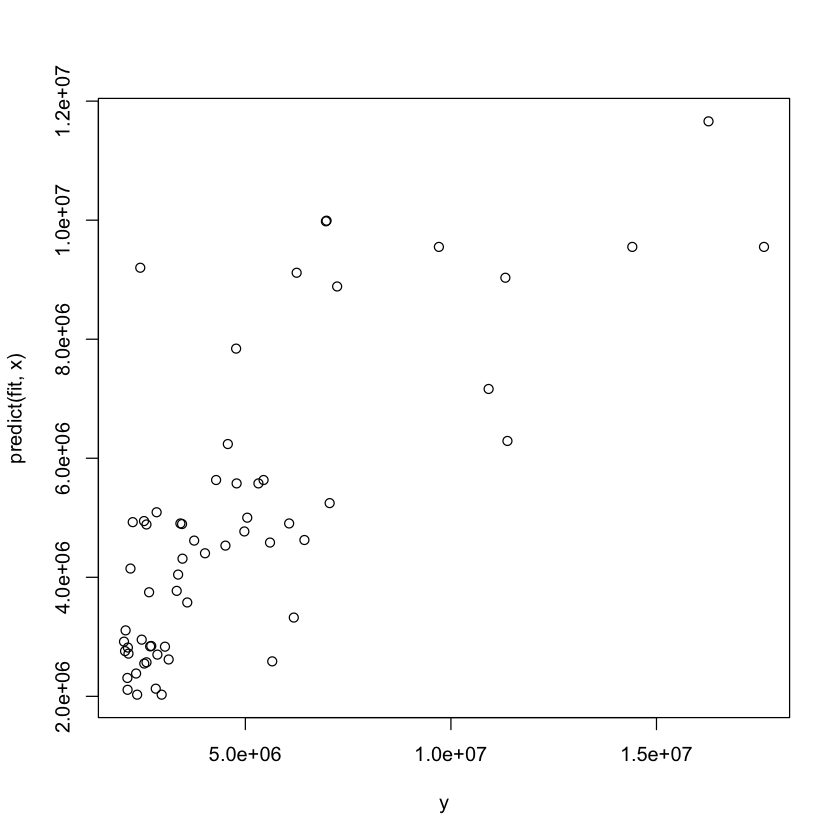

In [122]:
# NOT RUN {

samp <- createDataPartition(df[,1] , p = 0.7,list = F)
data.tr <- df[samp,]
data.test <- df[-samp,]

x <- data.test[,-1]
y <- data.test[,1]

fit <- knnreg(data.tr[,2:4],data.tr[,1], k = 3)

plot(y, predict(fit, x))

# }


In [123]:
predict(fit, x)

[1]  8885933  9550709  5634348  2619323  4770254  7164133  4616623  7842121
 [9]  3577098  4904591  2701067 11660471  6238847  2128651  5577357  4583602
[17]  2551018  9991332  2819592  3108072  9550709  2383605  2109987  2759870
[25]  4146822  6290678  5577357  4894923  2028071  2952525  9116441  3748546
[33]  2919036  2845783  2834252  2839539  2028071  9550709  2717816  5634348
[41]  4887446  3323448  4045532  4532424  4403405  4626263  2571617  9980781
[49]  5246402  4904591  9200756  4944670  2587678  2308924  5001496  4312958
[57]  3771988  5092684  9032815  4926661

In [101]:
CrossTable(x = genre5.testLabels, y = genre5_model, prop.chisq = FALSE )


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  59 

 
                  | genre5_model 
genre5.testLabels |   5317959 |   5508017 |   8666208 |   9707581 |  12706483 |  12983330 |  14411775 |  17615039 | Row Total | 
------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
                0 |         1 |         6 |         4 |         0 |         0 |         6 |         6 |         4 |        27 | 
                  |     0.037 |     0.222 |     0.148 |     0.000 |     0.000 |     0.222 |     0.222 |     0.148 |     0.458 | 
                  |     0.500 |     0.545 |     0.444 |     0.000 |     0.000 |     0.353 |     0.500 |     0.667 |           | 
                  |     0.017 |     0.102 |     0.068 |     0.000 |     0.000 |     0.102 |   

In [125]:
library(knitr)

In [128]:
softmax

ERROR: Error in eval(expr, envir, enclos): 객체 'softmax'를 찾을 수 없습니다
